Тестирование A/B маркетинговых кампаний
Использование Python для определения наиболее эффективных маркетинговых кампаний.

Кейс-стади

Компания по продаже модной одежды готовится запустить новый продукт в свой каталог. Однако руководство еще не решило, какую из трех маркетинговых кампаний лучше всего использовать для продвижения нового продукта. Поэтому они решили случайным образом распределить и представить новый продукт в отдельных торговых точках, чтобы проверить, какая маркетинговая стратегия оказывает наиболее значимое влияние на продажи. Для этого компания применяет разные подходы к маркетинговым кампаниям в каждой точке, а оценка нового продукта проводится по продажам за этот месяц (4 полных недели).

Описание набора данных
Наш набор данных состоит из 548 наблюдений, включающих:

OutletID: Уникальный идентификатор магазина. Каждый магазин обозначен своим номером. Общее число магазинов — 137.

AgeofOutlets: Возраст магазина в годах (от 1 до 28). Средний возраст магазина — 8,5 лет.

Campaigns: Одна из трех протестированных акций (1, 2 или 3).
Sales in Thousands: Объем продаж в тысячах долларов за конкретный магазин, кампанию и неделю. Среднее значение продаж — 53,5 тысячи долларов.

Market size: Размер рынка, делится на три типа: small (маленький), medium (средний) и large (большой).

Week: Неделя проведения акции (от 1 до 4).

Используемые библиотеки:

Pandas
Matplotlib
Seaborn
Scipy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

In [2]:
df = pd.read_csv('/content/drive/MyDrive/campaigns.csv')
df.head(10)

,OutletID,MarketSize,AgeofOutlets,Campaigns,Week,SalesInThousands
0,1,Medium,4,3,1,33.73
1,1,Medium,4,3,2,35.67
2,1,Medium,4,3,3,29.03
3,1,Medium,4,3,4,39.25
4,2,Medium,5,2,1,27.81
5,2,Medium,5,2,2,34.67
6,2,Medium,5,2,3,27.98
7,2,Medium,5,2,4,27.72
8,3,Medium,12,1,1,44.54
9,3,Medium,12,1,2,37.94


In [3]:
print(f'Rows            : {df.shape[0]}')
print(f'Columns         : {df.shape[1]}')
print(f'Features        : {df.columns.tolist()}')
print(f'Missing Values  : {df.isnull().values.sum()}')
print(f'Unique Values   : \n\n{df.nunique()}')

Rows            : 548
Columns         : 6
Features        : ['OutletID', 'MarketSize', 'AgeofOutlets', 'Campaigns', 'Week', 'SalesInThousands']
Missing Values  : 0
Unique Values   : 

OutletID            137
MarketSize            3
AgeofOutlets         25
Campaigns             3
Week                  4
SalesInThousands    517
dtype: int64


In [ ]:
df.describe()


EDA и визуализация

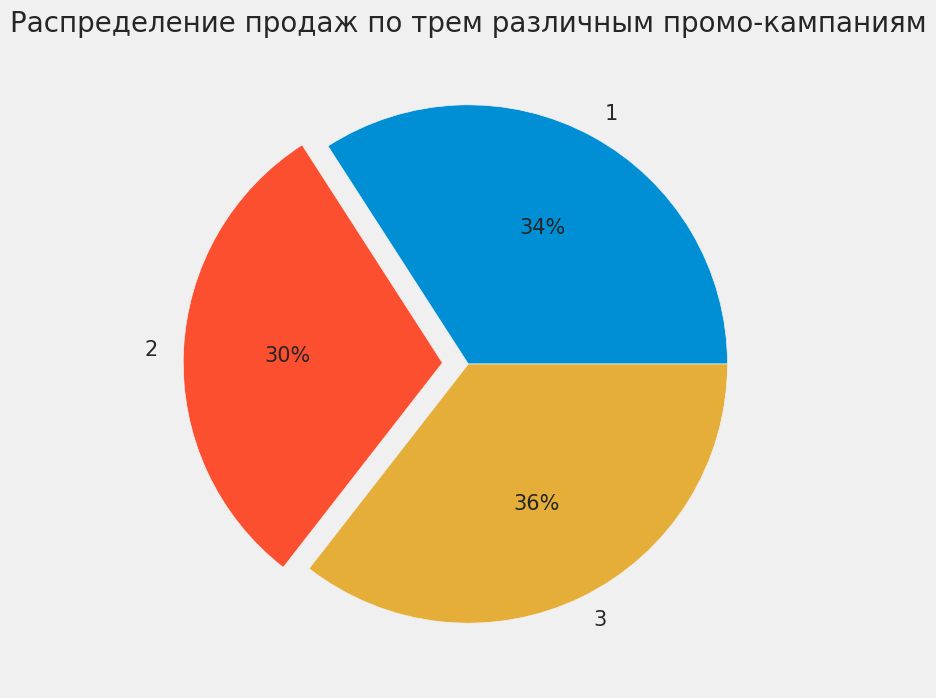

In [6]:
# Создание графиков для визуализации наших данных о продажах и маркетинге
# Используя стиль fivethirtyeight в matplotlib

plt.style.use('fivethirtyeight')
ax = df.groupby('Campaigns').sum()['SalesInThousands'].plot.pie(figsize=(8,8),
                                                                autopct='%1.0f%%',
                                                                explode = (0, 0.1, 0),
                                                                textprops = {'fontsize' : 15})
ax.set_ylabel('')
ax.set_title('Распределение продаж по трем различным промо-кампаниям', fontsize = 20)

plt.show()

In [ ]:
# Теперь давайте посмотрим акции для каждого размера рынка
df.groupby(['Campaigns', 'MarketSize']).count()['OutletID']

In [ ]:
# используем unstack
df.groupby(['Campaigns', 'MarketSize']).count()['OutletID'].unstack('MarketSize')

In [ ]:
ax = df.groupby(['Campaigns', 'MarketSize']).count()['OutletID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(10,8),
    grid=True)

ax.tick_params(axis = 'x', labelsize= 15)
plt.xticks(rotation = 'horizontal')
ax.tick_params(axis = 'y', labelsize = 15)
ax.set_ylabel('Count')
ax.set_title('Анализ размеров рынка по различным кампаниям', fontsize = 20)

plt.show()

In [ ]:
ax = df.groupby('AgeofOutlets').count()['OutletID'].plot(
    kind='bar',
    figsize=(12,7),
    grid=True)

ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Общие распределения по возрастам точек продаж')

plt.show()

In [ ]:
# Visualize this summary
ax = df.groupby(['AgeofOutlets', 'Campaigns']).count()['OutletID'].unstack('Campaigns').iloc[::-1].plot(
    kind='barh',
    figsize=(14,18),
    grid=True)

ax.set_ylabel('Age')
ax.set_xlabel('Count')
ax.set_title('Общие распределения по возрастам точек продаж')

plt.show()

In [ ]:
# Every campaigns has similar age profiles and the average outlet ages is around 8 ~ 9 years old
# Majority of the outlet are around 10 ~ 12 years old or younger

df.groupby('Campaigns').describe()['AgeofOutlets']

Проведение A/B тестирования трех маркетинговых кампаний



In [ ]:
means = df.groupby('Campaigns').mean()['SalesInThousands']
stdev = df.groupby('Campaigns').std()['SalesInThousands']
obs = df.groupby('Campaigns').count()['SalesInThousands']
print(f'===== MEAN ====== \n{means}\n')
print(f'===== STANDARD DEVIATION ====== \n{stdev}\n')
print(f'===== OBSERVATIONS ====== \n{obs}\n')

A/B Testing: 1st Campaigns vs 2nd Campaigns

In [ ]:
# Computing the t and p values using scipy

t, p = stats.ttest_ind(df.loc[df['Campaigns'] == 1, 'SalesInThousands'].values,
                       df.loc[df['Campaigns'] == 2, 'SalesInThousands'].values,
                       equal_var=False)
print(f't-value = {str(t)}')
print(f'p-value = {str(p)}')

Анализ значений P и t-values (1 vs 2)
Наше значение p близко к 0, что означает наличие хороших доказательств для отвергания нулевой гипотезы. Это означает, что существует статистическая разница между двумя группами. Обычно порог для отвергания нулевой гипотезы составляет менее 0,05.

Более того, t-тест показывает, что маркетинговая эффективность этих двух групп значительно различается, и первая маркетинговая кампания превосходит вторую.

A/B Testing: 1st Campaigns vs 3rd Campaigns

In [ ]:
t, p = stats.ttest_ind(
    df.loc[df['Campaigns'] == 1, 'SalesInThousands'].values,
    df.loc[df['Campaigns'] == 3, 'SalesInThousands'].values,
    equal_var = False)

print(f't-value = {str(t)}')
print(f'p-value = {str(p)}')

Анализ значений P и t-values (1 vs 3)
Мы отмечаем, что средние продажи по первой маркетинговой кампании (58,1) выше, чем по третьей кампании (55,36). Но при выполнении t-теста между этими двумя группами мы получаем t-значение 1,556 и p-значение 0,121. Полученное p-значение значительно выше порога 0,05, что означает отсутствие статистической значимости.

A/B Testing: 2nd Campaigns vs 3rd Campaigns


In [ ]:
t, p = stats.ttest_ind(
    df.loc[df['Campaigns'] == 2, 'SalesInThousands'].values,
    df.loc[df['Campaigns'] == 3, 'SalesInThousands'].values,
    equal_var = False)

print(f't-value = {str(t)}')
print(f'p-value = {str(p)}')

Анализ значений P и t-values (2 vs 3)
На основе средних продаж, вторая маркетинговая кампания (47,33) отличается от третьей кампании (55,36). При выполнении t-теста между этими двумя группами результат показывает, что p-значение (0,000001569) ниже порога 0,05, что приводит к отверганию нулевой гипотезы. Другими словами, существует статистическая разница между второй и третьей маркетинговыми кампаниями.